In [28]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from einsteinpy.utils import kerr_utils, schwarzschild_radius

In [63]:
M = 4e30
scr = schwarzschild_radius(M * u.kg).value

# for typical rotating black hole
a1 = 0.3*scr

# for rapidly rotating black hole
a2 = 0.499*scr

# for nearly maximally rotating black hole
a3 = 0.499999999*scr


In [64]:
ergo1, ergo2, ergo3, hori1, hori2, hori3 = list(), list(), list(), list(), list(), list()
thetas = np.linspace(0, np.pi, 720)
for t in thetas:
    ergo1.append(kerr_utils.radius_ergosphere(M, a1, t, "Spherical"))
    ergo2.append(kerr_utils.radius_ergosphere(M, a2, t, "Spherical"))
    ergo3.append(kerr_utils.radius_ergosphere(M, a3, t, "Spherical"))    
    hori1.append(kerr_utils.event_horizon(M, a1, t, "Spherical"))
    hori2.append(kerr_utils.event_horizon(M, a2, t, "Spherical"))
    hori3.append(kerr_utils.event_horizon(M, a3, t, "Spherical"))    
ergo1, ergo2, ergo3, hori1, hori2, hori3 = np.array(ergo1), np.array(ergo2), np.array(ergo3), np.array(hori1), np.array(hori2), np.array(hori3),

In [65]:
Xe1, Ye1 = ergo1[:,0] * np.sin(ergo1[:,1]), ergo1[:,0] * np.cos(ergo1[:,1])
Xh1, Yh1 = hori1[:,0] * np.sin(hori1[:,1]), hori1[:,0] * np.cos(hori1[:,1])
Xe2, Ye2 = ergo2[:,0] * np.sin(ergo2[:,1]), ergo2[:,0] * np.cos(ergo2[:,1])
Xh2, Yh2 = hori2[:,0] * np.sin(hori2[:,1]), hori2[:,0] * np.cos(hori2[:,1])
Xe3, Ye3 = ergo3[:,0] * np.sin(ergo3[:,1]), ergo3[:,0] * np.cos(ergo3[:,1])
Xh3, Yh3 = hori3[:,0] * np.sin(hori3[:,1]), hori3[:,0] * np.cos(hori3[:,1])

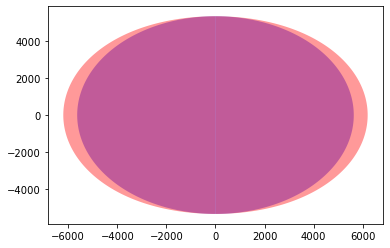

In [66]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill(Xh1, Yh1, 'b', Xe1, Ye1, 'r', alpha=0.4)
ax.fill(-1*Xh1, Yh1, 'b', -1*Xe1, Ye1, 'r', alpha=0.4)

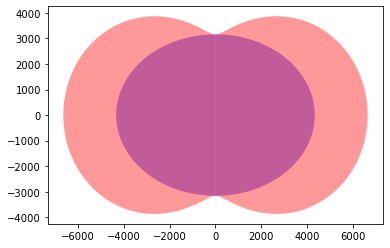

In [67]:
%matplotlib inline
fig2, ax = plt.subplots()
ax.fill(Xh2, Yh2, 'b', Xe2, Ye2, 'r', alpha=0.4)
ax.fill(-1*Xh2, Yh2, 'b', -1*Xe2, Ye2, 'r', alpha=0.4)

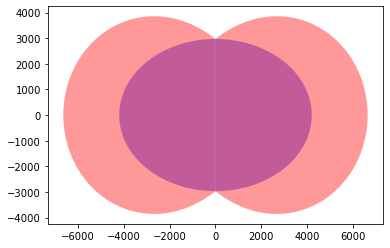

In [68]:
%matplotlib inline
fig3, ax = plt.subplots()
# for maximally rotating black hole
ax.fill(Xh3, Yh3, 'b', Xe3, Ye3, 'r', alpha=0.4)
ax.fill(-1*Xh3, Yh3, 'b', -1*Xe3, Ye3, 'r', alpha=0.4)